# Data Science: Infering and Modeling

<hr/>

## Section 1

## Parameters and Estimates

We need to understand the connection between pools and the probability theory. Let's construct a scenario that we can work, and that is similar to the one that pollsters face.

We will use an urn instead of voters. And because pollsters are competing with other pollsters for media attention, we will imitate that by having our competition with a $25 price.

The challenge is to guess the spread between the proportion of *blue and red balls* in the urn.

<center><img src="images/urn.png" width=100 height=100/></center>

Before making  a prediction, we can take a sample, with replacement, from the urn. To mimic the fact that running pools is expensive, it will cost us $0.10 per bead you sample. So if we sample size is 250 and you win, we'll break even, as we'll have to pay me $25 to collect your $25.

Our entry into the competition can be an interval. If the interval we submit contains the true proportion, we get half what you paid and pass to second phase of the competition.

The second phase of the competition, the entry with the smallest interval is selected as the winner.

The ***dslabs*** package includes a function that shows a random draw from the urn. The code that we can write to see a sample is:

In [1]:
my_packages <- c( "dslabs", "tidyverse" )
not_installed <- my_packages[!(my_packages %in% installed.packages() [, "Package"])]
if ( length( not_installed ) ) install.packages( not_installed )

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library( tidyverse )
library( dslabs )

ds_theme_set()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



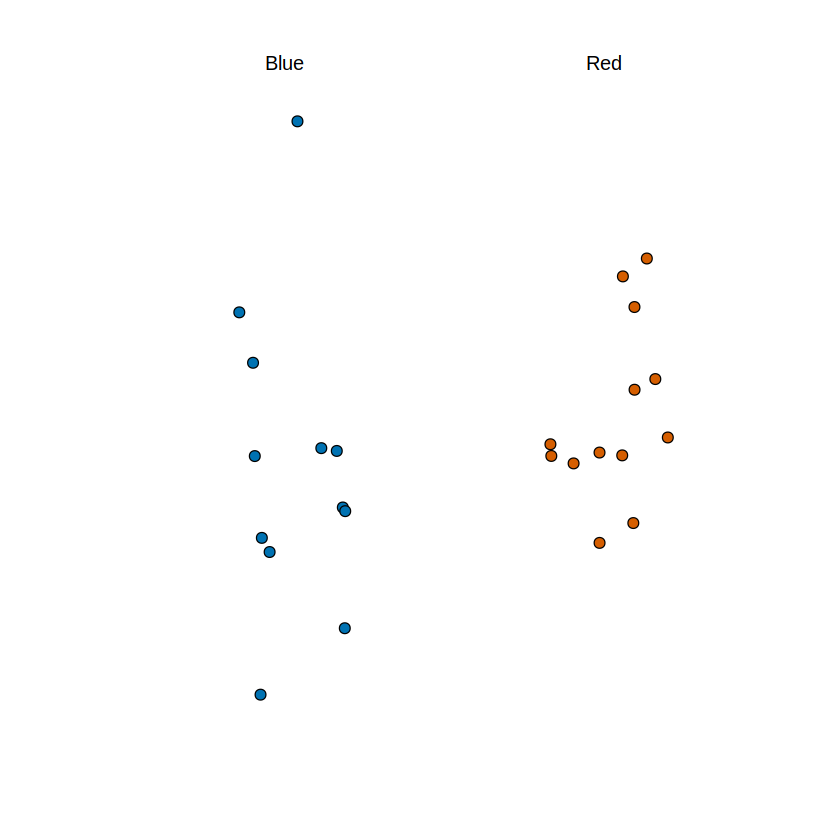

In [5]:
take_poll( 25 )

Now that we know the rules, think about how we would construct our interval. Notice that we have just described a *simple sampling model for opinion polls*. The beads inside urn represent the individuals that will vote on election day. Those that will vote **Republican** are represented with **read beans**, and **Democrats** with **blue beads**, we assume there are no other colors, that there are just two parties.

We want to predict the proportion of blue beads in the urn. Let's call this quantity \quantity, which in turn tell us the proportion of red beads, $1-p$, and the spread, $p - (1-p)$, which simplfies $2p - 1$.

Concepts:

* In statistical textbooks, the beads in the urn are called **the population**. 
* The proportion of blue beads in teh population, p, is called **parameter**. 
* The 25 beads that we saw in an earlier plot that's called a **sample**.
* The task of **statistical inference** is to *predict the parameter*, p, using the observed in the *sample*

Now we can do this with just the 25 observations we showed you?. For example, given that we see 14 red and 11 blue, it is unlikely that *p* is bigger than 0.9 or smaller than 0.1. The proportion red and blue. The proportion of reds and blues will be different every time we run the above code, the *take_poll* function.

But are we ready to predict with certainly that there are more red beads than blue?. Ok, what we want to do is contruct and *estimate of p* using only the information we observe. An *estimate* can be thought of as a *summary of the observed data that we think is informative about the parameter of interes*. In this case, the proportion of blue beads is $12/25 = 0.48$, but as the sample proportion is a *random variable*, if we run the *take_poll(25)* n-times, we will get different answers.

This set of results describing the **distribution of this random variable**,  we'' be able to gain insights into how good this estimate is and how we can make it better.


#### Key points

* the task of statistical inference is to estimate an unknown population parameter using observed data from a *sample*.
* In a sampling model, the collection of elements in the urn is called *population*.
* A *parameter* is a number that summarizes data for an entire population.
* A *sample* is observed data from a subset of the population.
* An *estimate* is a summary of the observed data about a parameter that we believe is informative.
* We want to predit the proportion of the blue beads in the urn, the parameter *p*. The proportion of red beans in the urn is $1 - p$ and the *spread* is $2p - 1$.
* The *sample proportion* is a **random variable**. Sampling gives random results drawn from the population distribution.

### The sample average

Once we have this estimate (previous example), we can easily report an estimate of the spread. But for simplicity, we will illustrate the concept of *statistical inference* for estimating *p*. 

We will use our knowledge of probability to defend our use of the *sample proportion*, and quanitfy how close we think it is from the population proportion *p*. We start by defining the randmo variable *X*, it's going to be 1 if we pick a blue bead at random, and 0 it's red. This implies that we're assuming that the population, the beads in the urn, are a list of 0s and 1s.

If we sample *N-beads*, then the *average* of the draws $X_1$ through $X_N$ is equivalent to the proportion of blue beads in our sample. The average is denoted by

$$\overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N}$$

In general, the statistics textbooks, a bar on top of a symbol means the **average**.

The theory we just learned about the sum of draws becomes useful, because we know the distribution of the sum *N-times X-bar*

$$N\overline{X} = \frac{N(X_1 + X_2 + \ldots + X_N)}{N} = (X_1 + X_2 + \ldots + X_N)$$



For simplicity, let's assume that the draws are independent. After we see each smaple bead, we return it to the urn, it's a sample with replacement. In this case, what do we know about the distribution of the sum of draws?

We know that the expecte value of the sum of draws is $N\overline{X}$ of the values in the urn. We know that the average of the 0s and 1s in the urn must be the proportion *p*, the value we want to estimate. Here we don't know what is in the urn, we know there are blue and red beads, but we don't know how many of each, this is what we're trying to find out.

Just like we use variable to define unknowns in systems of equations. In statistical inference, we define parameteres to define unknown parts of our models. In the urn model we are using to mimic an opinion poll, we do not know the proportion of blue beads in the urn, we define the parameter *p* to represent this quantity.

Note that the ideas presented here, on how we estimate parameters and provide insights into how good these estimates are, extrapolate to many data science tasks.

#### Key points

* Many common data science tasks can be framed as estimating a parameter from a sample.
* We illustrate statistical inference by walking through the process to estimate *p*. We can easily calculate an estimate of the spread, *2p - 1*.
* Consider ramdon variable *X* that is 1 if blue bead is chosen and 0 if a red bead is chosen. The proportion of blue beads in *N-draws* is the **average of the draws** $X_1, X_2, \ldots , X_N$.
* $\overline{X}$ is the *sample average*. In statistics, a bar on top of a symbol denotes the average. $\overline{X}$
  $$\overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N}$$
* The number of blue beads drawn in *N-draws*, $N\overline{X}$, is *N* times the proportion of values in the urn. However, we do not known the true proportion: we are trying to estimate this parameter *p*

### Polling versus forecasting  (*sondeo versus pronóstico*)

Let's make an important clarification related to the practical problem of forecasting the election (pronóstico de elección). If a poll is conducted 4 months before the elecction, it is estimation the *p* for that moment, not for election day. But, note that the *p* for election night might be different since people's opinions fluctuate through time.

The polls provided the night before the election tend to be the mos accurate since opinions don't change that much in a couple of days.

However, **forecasters** try to build tools that model how opinions vary across time and try to predict the election day result, takeing into consideration the fact that opinions fluctuate.

### Properties of our estimate


To understand how good our estimate is, we'll describe the *statistical properties of the random variable* we just defined, ***the sample proportion***.

Using what we have learned, the expected value of the sum *N times $\overline{X}$* is *N times the average of the urn, p*.

$$
\begin{array}{l}
    \overline{X} = \frac{X_1 + X_2 + \ldots + X_N}{N} \\
    \\
    N\overline{X} = \frac{N(X_1 + X_2 + \ldots + X_N)}{N} = X_1 + X_2 + \ldots + X_N \\
    \\
    E(N\overline{X}) = N \ast p \implies \frac{E(N\overline{X})}{N} = E(\overline{X}) = p
\end{array}
$$

So dividing by the *non-ramdom constant N* give us that the expected value of the average $\overline{X}$ is *p*.

We also can use what we know about ***standard error***. We know that the *standard error* of the sum is *square root of N times a standard deviation of the values of the urn*.

We learn a formula that tells us that it's:

$$ (1 - 0) \sqrt{p(1 - p)} $$

Because we are dividing by the *sum N*, we arrive at the following formula for the *standard error of the average*:

$$ SE(\overline{X}) = \sqrt{\frac{p(1 - p)}{N} } $$

This result reveals the power of polls. We can make the *standard error* as samll as we want by increasing the sample size *N*. The ***law of large numbers*** tells us that with a large enough poll, our estimate converges to *p*. If we take a large enough poll to make our standard error about 0.01, we'll be quite certain about who will win.



But, how large does the poll have to be for standard error to be this small?. One problem is that we do not know *p*, so we can't actually compute the standard error. Let's assume that *p = 0.51* and make a plot of the standard error versus *sample size N*, here is the graph:

<center><img src="images/standard_error.png" with="350" height="350" /></center>

We can see that it's dropping, we see that would need a poll of over 10,000 people to get the standard error as low as we want it to be. Polls if this size are very expensive and it is rare that they do, between other reasons.

For a *sample size of 1,000*, if we set *p = 0.51*, the standard error is about *0.15*, or *1.5%* points. So even with large polls for close elections, $\overline{X}$ can lead us astray if we don't realize it's a random variable.

#### Key points

* When interpreting values of $\overline{X}$, it is important to remember that $\overline{X}$ is random variable with an expected value and standard error that representes the sample proportion of positive events.
* The expected value of $\overline{X}$ is the parameter of *interest p*: $E(\overline{X}) = p$.
* As the number of draws *N* increases, the standard error of our estimate $\overline{X}$ decreases. The standard error (SE) of the average of $\overline{X}$ over *N* is $SE(\overline{X}) = \sqrt{p(1-p)/N}$
  * In theory, we can get more accurate estimates of *p* by increasing *N*. In practice, there are limits on the size of *N* due to costs.
  * We can also use other random variables equations to determine the expected value of the sum of draws *E(S)* and standard error of the sum of draws *SE(S)*:
    $$
    \begin{array}{l}
        E(S) = Np \\ 
        SE(S) = \sqrt{Np(1-p)}
    \end{array}
    $$

Exercise 1. Polling - expected value of S

We suppose you poll a population in which a proportion *p* of voters are Democrats and *1-p* are Republicans. You sample size is *N=25*. Consider the random variable *S*, which is the **total number of Democrats** in your sample. What is the expected value of this random variable *S*?.

<center>E(S) = Np = 25p</center>

Exercise 2. Polling - standard error of S

Again, consider the random variable *S*, which is the **total number of Democrats** in your sample of 25 voters. The variable *p* describes the proportion of Democrats, whereareas *1-p* describes the proportion of Republicans. What is the standard error of S?.

$$SE(S) = \sqrt{Np(1-p)} = \sqrt{25p(1-p)}$$


Exercise 3. Polling - expected value of $\overline{X}$.

Consider the random variable *S/N*, which is equivalent to the sample average that we have been denoting as $\overline{X}$. The variable *N* represents the size and *p* is the proportion of Democrats in the population. What is the expected value of $\overline{X}$?.
$$ E(\overline{X}) = p$$


Exercise 4. Polling - standard error of $\overline{X}$

What is the standar error of the sample average, $\overline{X}$?.

The variable *N* represents the sample size and *p* is the proportion of Democrats in the population.

$$  SE(\overline{X}) = \sqrt{p(1-p)/N} $$

Exercise 5. *SE* versus *p*

Write a line of code that calculate the standard error (*SE* or *se*) of a sample average when you poll 25 people in the population. Generate a sequence of 100 proportions of Democrats *p* that vary from 0 (no Democrats) to 1 (all Democrats).

Plot *se* versus *p* for the 100 different proportions.

Instructions:

* Use the *seq* function of R to generate a vector of 100 values of *p*, that range from 0 to 1.
* Use the *sqrt* function to generate a vector of standard errors for all values of *p*.
* Use the *plot* function to generate a plot with *p* on the x-axis and *se* on the y-axis.

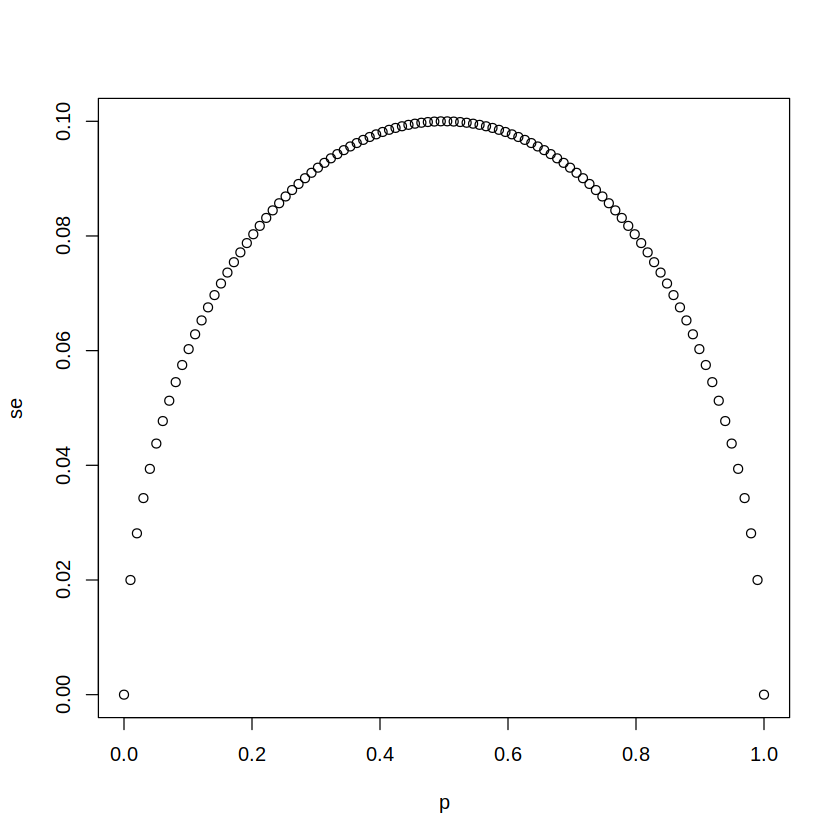

In [2]:
N <- 25                                             # number of people polled
p <- seq( from=0, to=1, length.out=100 )            # sequence of 100 proportions in range 0 to 1.
se <- sqrt(p*(1-p)/N)                                # create se for each sample average.

plot( p, se )

Exercise 6. Multiple plots of *se* versus *p*.

Using the same code as an the previous exercise, create a *for-loop* that generates three plots of *p* versus *se* when the sample sizes equal *N=25*, *N=100*, and *N=1000*.

Instruction:

* the *for-loop* should contain two lines of code to be repeated for three different values of *N*.
  * the first line within the *for-loop* should use the *sqrt* function to generate a vector of standard errors, *se*, for all values of *p*.
  * the second line within the *for-loop* should use the *plot* function to generate a plot with *p* on x-axis and *se* on the y-axis.
* Use the *ylim* argument to keep y-axis limits constant across all three plots. The lower limit should be equalt to 0, and the upper limit should equal 0.1.

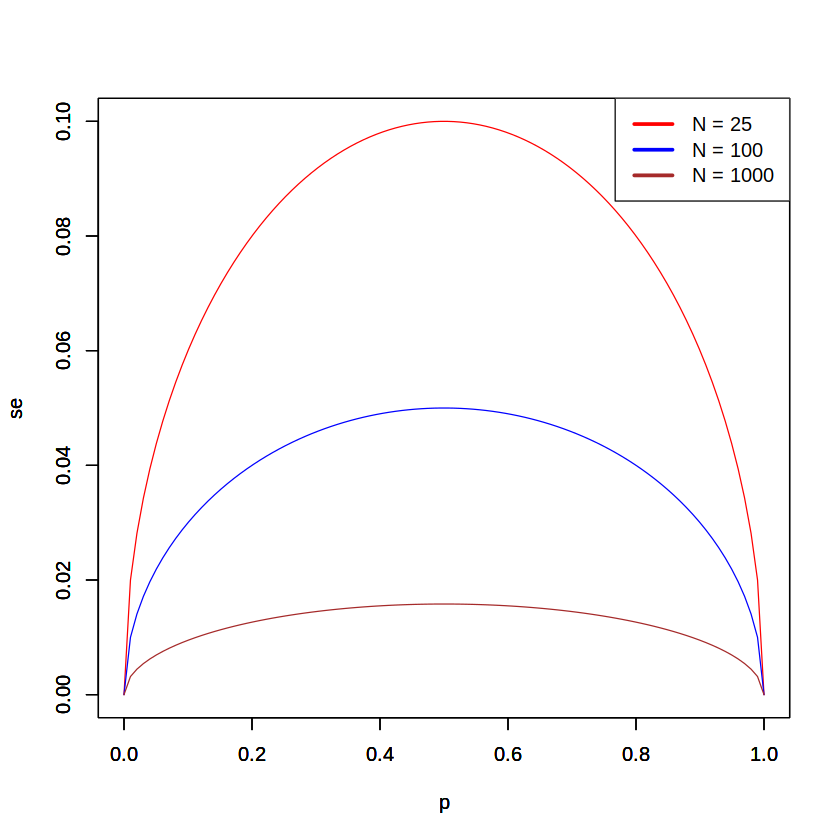

In [19]:
p<- seq( 0, 1, length=100 )
sample_sizes <- c( 25,100,1000 )                            # vector contains the three sample sizes.

nord <- 0
for ( x in sample_sizes ) {
    se <- sqrt( p*(1-p)/x ) 
    if (nord == 0) {
        color = 'red'
        nord <- nord + 1
    } 
    else if (nord == 1) {
        color = 'blue'
        nord <- nord + 1
        par( new=TRUE )
    } else {
        color = 'brown'
        nord <- nord + 1
        par( new=TRUE )
    }
    plot( p, se, type="l", col=color, ylim=c(0,0.1) )
}
legend("topright", legend=c("N = 25","N = 100","N = 1000"), lwd=3, col=c("red","blue","brown") )

Exercise 7. Expected value of *d*.

Our estimate for the difference in proportions of Democrats and Republicans is $d = \overline{X} - (1 - \overline{X})$. Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the expected value of *d*?

$$
\begin{array}{l}
    d = \overline{X} - (1 - \overline{X}) \equiv E[\overline{X} - (1 - \overline{X})] = 2E[\overline{X} - 1] = 2E[\overline{X}] - 1\\
    \\
    E(\overline{X}) = p \\
    \\
    2E[\overline{X}] - 1 = 2p - 1 = p - (1 - p) = d
\end{array}
$$

Exercise 8. Standard error of *d*.

Our estimate for the difference in proportions of Democrats and Republicans is $d = \overline{X} - (1 - \overline{X})$. Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the standard error of *d*?.


$$
\begin{array}{l}
    d \equiv SE[\overline{X} - (1 - \overline{X})] = 2SE[\overline{X}] - 1\\
    \\
    SE(\overline{X}) = \sqrt{p - (1-p)/N} \\
    \\
    2SE[\overline{X}] - 1 = 2\sqrt{p-(1-p)/N} - 1 = d
\end{array}
$$

But, substract 1 does not affect the standard error, the answer correct is $d=2\sqrt{p-(1-p)/N}$

Exercise 9. Standard error of the spread

Say the actual proportion of Democratic voters is *p=0.45*. In this case, the Republican party is winning by a relatively large margin of *d=-0.1*, or a *10\%* margin of victory. What is the standard eror of the spread $2\overline{X} - 1$ in this case?.

Instructions:

* use the *sqrt* function to calculate the standard error of the spread $2\overline{X} - 1$.

In [21]:
N <- 25                                 # number of people polled
p <- 0.45                               # proportion of Democratic voters

se <- 2*sqrt( (p*(1-p))/N )

print( se )

[1] 0.1989975


Exercise 10. Sample size.

So far we have said that the difference between the proportion of Democratic voters and Republican voters is about *10%* adn that the standard error of this spread is about *0.2* when *N=25*. Select the statement that explains why this sample size is sufficient or not.

1. This sample size is sufficient because the expected value of our estimate $2\overline{X} - 1$ is *d* so or prediction will be right on.
2. This sample size is too small because the standard error is larger than the spread.
3. This sample size is sufficient because standard error of about 0.2 is much smaller than the spread of 10%.
4. Without knowing *p*, we have no way of knowing that increasing or sample would actually improve our standard error.

Solution: answer 2.




<hr/>

## Section: The Central Limit Theorem (CLT) in Practice

The **Central Limit Theorem** tells us that the *distribution function for a sum of draws ($X_1+X_2+\ldots+X_N$) is approximately **normal***.

We also learned that *when dividing a normlly distributed random variable by a non-random constant, the resulting random variable is also normally distributed*.

$$
\begin{array}{l}
    X \sim N(\mu, \sigma) \\
    \\
    \frac{X}{a} \sim N\left(\frac{\mu}{a},\frac{\sigma}{a}\right)
\end{array}
$$

This implies that the *distribution of* $\overline{X}$ *is approximately **normal*** . In the previous section we determined that the *expected value is p* ($\overline{X}:p$), and the *standard error is the square root of p(1-p) divided by the sample size N*.

$$
\begin{array}{l}
    \overline{X} = p \\
    \\
    \overline{X} = \sqrt{\frac{p(1-p)}{N}}
\end{array}
$$

Now, how does this help us?.

Suppose we want to know what is the probability that we are within one percentage point from *p*?. Basically asking, what's teh probability that the distance between $\overline{X}$ and *p*, the absolute value of $\overline{X} - p$ is less than $0.01$:

$$Pr(|\overline{X} - p| \leq 0.01)$$

We can use what we've learned to see that this is the same as asking, what is the probability of $\overline{X}$ being less than or equal to *p* + *0.01 minus the probability of* $\overline{X}$ *being less than or equal to p - 0.01*.

<center><img src="images/sec02_01.png" width="50%" height="50%" /></center>

Can we compute that probability?. We can use the mathematical trick that we learned in the previous section. WE subtract the expected value and divide by the standard error on both sides of the equation.

$$
\begin{array}{l}
Pr\left(\frac{\overline{X} - E(\overline{X})}{SE(\overline{X})} \leq \frac{(p+0.01)-E(\overline{X})}{SE(\overline{X})}\right) - Pr\left( \frac{\overline{X} - E(\overline{X})}{SE(\overline{X})} \leq -\frac{(p-0.01)-E(\overline{X})}{SE(\overline{X})} \right) \\
\\
\mathit{Z} = \frac{\overline{X} - E(\overline{X})}{SE(\overline{X})} \\
\\
Pr\left(\mathit{Z} \leq \frac{(p+0.01)-E(\overline{X})}{SE(\overline{X})}\right) - Pr\left( \mathit{Z} \leq -\frac{(p-0.01)-E(\overline{X})}{SE(\overline{X})} \right) \\
\\
\\
p = E(\overline{X}) \\
\\
SE(\overline{X}) = \sqrt{\frac{p(1-p)}{N}}\\
\\
Pr\left(\mathit{Z} \leq \frac{0.01}{\sqrt{\frac{p(1-p)}{N}}}\right) - Pr\left( \mathit{Z} \leq -\frac{0.01}{\sqrt{\frac{p(1-p)}{N}}} \right) \\
\end{array}
$$


Ok, now can we compute this probability?. No yet. Our problem is that we don't know *p*. So we can't actually compute the standard error of $\overline{X}$ using just the data. The CLT still works if we use an estimate of the standard error that, instead of *p*, uses $\overline{X}$ in its place, we call this a plug-in estimate (estimación complementaria). Our estimate of the standard error is therefore:

$$
\widehat{SE} = \sqrt{\frac{\overline{X}(1-\overline{X})}{N}}
$$

We can see a *hat on top of SE*, in statistics textbooks, we use a little hat like this to denote **estimates**. This is an estimate of the standard error, not the actual standard error.

Note that, importantly, that this estimate can actually be constructed using the observed data.

Now, let's continue our calculations. But now instead of dividing by the standard error, we're going to divide by this *estimate of the standard error*. Let's compute this estimate of the standard error for the first example that we took, in which we had:

* 12 blue beads
* 13 red beads
* The $\overline{X} = 12/25 = 0.48$.

So to compute the standard error (SE), we simply write this code

In [8]:
X_hat <- 0.48 
se <- sqrt( X_hat * (1 - X_hat) / 25 )
se

[1] 0.09991997

And we get that it's $0.0999199\ldots \approx 0.1$. So now, we can answer the question. We can compute the probability of being as close to *p* as we wanted. We wanted to be 1 percentaje point away. The answer is simply:

In [10]:
pnorm( 0.01/se ) - pnorm( -0.01/se)

[1] 0.07971926

The answer is that the probability of this happening is about 8\%. So there is a **very small chance** that we'll be as close as this to the actual proportion.

It wasn't very useful, but what it's going to do, what we're going to be able to do with the CLT is determine what sample sizes are better. We'll be able to provide a very good estimate and some very informative probabilities.



### Margin of error


So a poll of only 25 people is not really very useful, at least for a close election. Earlier we mentioned the ***margin of error***, which we can now estimate. We can define it because it is simply $2\ast SE$. In our cas it was 2 times *SE*, which is about *0.2*.

In [11]:
2*se

[1] 0.1998399

Why do we multiply by 2?. This is because if you ask what is the probability that we're within 2 stanard errors from *p*, using the same previous equations, we en up with an equation like this one.

$$Pr( |\overline{X}) - p| \leq 2SE(\overline{X}) )$$

$$Pr( \overline{X} \leq p + 2SE(\overline{X}) ) - Pr( \overline{X} \leq - 2SE(\overline{X}) ) $$

This one simplifies out, and we're simply asking what is the probabilitiy of the standar normal distribution that has the expected value 0 and standard error one is within two values from 0, and we know that this is about 95\%.

$$
\begin{array}{l}
Pr( \overline{X} \leq p + 2SE(\overline{X}) ) - Pr( \overline{X} \leq - 2SE(\overline{X}) ) \\
\\
Pr( \mathit{Z} \leq 2SE(\overline{X}/SE(\overline{X})) ) - Pr( \mathit{Z} \leq - 2SE(\overline{X}/SE(\overline{X}))\\
\\
Pr( \mathit{Z} \leq 2 ) - Pr( \mathit{Z} \leq -2 ) 
\end{array}
$$


In [12]:
pnorm(2) - pnorm(-2)

[1] 0.9544997

So there's a $95\%$ chance that $\overline{X}$ will be within 2 standard errors. That's the *margin of error*, in our case, to *p*.

Now why do we use 95\%?, It's somewhat arbitrary, traditionally, that's been used.

In summary, the *Central Limit Theorem* tells us that *our poll based on a sample of just 25 is not very useful*. We don't really learn much when the margin of error is this large. All we can really say is that the popular vote wil not be won by a large margin. This is why pollsters tend to use larger sample sizes.


From the table that we see down, from *RealClearPolitics*, we see that a typical sample size was between 700 and 3,500.

<center><img src="images/general_election.png" width="75%" height="75%" /></center>

To see how this gives us a much more practical result, note that if we had obtained an $\overline{X}$ of $0.48$, but with a sample size of $2,000$, the estimated standard error would have been about $0.01$. So our result is an estimate of $48\%$ blue beads with a margin of error of $2\%$. In this case, the result is much more informative and would make us think that there are more red beads than the blue beads.



### Monte Carlo Simulation for the *CTL*



To create a simulation, we would need to write code like this

In [4]:
B <- 10000 
N <- 1000

X_hat <- replicate( B, {
    X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p, p))
    mean(X)
})

The problem is that we can't run the code we just showed you because we don't know what *p* is. However, we could construct an urn like the one we showed in a previous section and actually run an analog simultaion. It would take a long time because you would be picking beads and counting them, but we could take *10,000* samples, count the beads each time, and keep track of the proportions that you see.

We can use the function *take_poll* with *N=1,000*, but it would still take time because we would to count the beads and enter the results into *R*.

One thing we can do is to pick a value of *p* or several values of *p* and then run a simulations using those. An example, let's set *p = 0.45*, we can simulate one poll of *1,000* beads or people using this simple code:


In [5]:
p <- 0.45 
N <- 1000
X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
X_hat <- mean(X)
X_hat

[1] 0.457

Now we can take that into a *Monte Carlos Simulation*. Do it *10,000* times, each time returning the proportion of blue beads that we get in our sample.

In [10]:
B <- 10000

X_hat <- replicate( B, {
    X <- sample( c(0,1), size=N, replace=TRUE, prob=c(1-p,p) )
    mean( X )
})
X_hat

[1] 0.439 0.436 0.469 0.470 0.453 0.460 0.478 0.454 0.486 0.460 0.440 0.481
   [13] 0.456 0.452 0.443 0.439 0.438 0.472 0.444 0.456 0.437 0.478 0.465 0.459
   [25] 0.437 0.454 0.434 0.462 0.435 0.440 0.481 0.440 0.441 0.449 0.452 0.428
   [37] 0.456 0.444 0.451 0.470 0.437 0.462 0.441 0.454 0.463 0.456 0.475 0.428
   [49] 0.468 0.461 0.453 0.430 0.426 0.437 0.447 0.439 0.449 0.437 0.437 0.450
   [61] 0.454 0.455 0.450 0.406 0.455 0.455 0.460 0.452 0.441 0.437 0.458 0.456
   [73] 0.460 0.441 0.438 0.476 0.473 0.482 0.431 0.432 0.454 0.461 0.473 0.439
   [85] 0.439 0.435 0.478 0.436 0.457 0.480 0.448 0.459 0.446 0.439 0.442 0.454
   [97] 0.459 0.464 0.464 0.451 0.454 0.458 0.428 0.484 0.451 0.434 0.462 0.453
  [109] 0.411 0.452 0.457 0.463 0.437 0.451 0.434 0.467 0.446 0.463 0.426 0.446
  [121] 0.459 0.451 0.461 0.441 0.468 0.455 0.425 0.443 0.422 0.435 0.458 0.451
  [133] 0.428 0.471 0.433 0.440 0.464 0.460 0.468 0.463 0.458 0.421 0.461 0.433
  [145] 0.466 0.451 0.477 0.452 0.459 0.482 0.465 0.452 0.463 0.473 0.413 0.447
  [157] 0.478 0.446 0.460 0.450 0.450 0.450 0.461 0.464 0.416 0.470 0.472 0.454
  [169] 0.439 0.432 0.461 0.471 0.446 0.448 0.472 0.477 0.445 0.443 0.446 0.441
  [181] 0.449 0.465 0.474 0.450 0.428 0.440 0.434 0.470 0.453 0.459 0.453 0.447
  [193] 0.448 0.457 0.435 0.474 0.464 0.434 0.458 0.447 0.455 0.444 0.445 0.457
  [205] 0.457 0.431 0.463 0.447 0.461 0.467 0.449 0.453 0.454 0.450 0.434 0.431
  [217] 0.477 0.456 0.459 0.464 0.469 0.436 0.468 0.467 0.471 0.449 0.445 0.475
  [229] 0.443 0.440 0.441 0.436 0.452 0.427 0.441 0.456 0.461 0.462 0.421 0.428
  [241] 0.453 0.438 0.455 0.462 0.433 0.442 0.448 0.464 0.482 0.468 0.449 0.451
  [253] 0.467 0.413 0.457 0.454 0.451 0.444 0.452 0.451 0.454 0.426 0.493 0.447
  [265] 0.446 0.447 0.450 0.443 0.463 0.450 0.462 0.461 0.450 0.447 0.437 0.426
  [277] 0.448 0.444 0.456 0.424 0.450 0.449 0.445 0.433 0.465 0.443 0.456 0.458
  [289] 0.461 0.437 0.455 0.444 0.463 0.449 0.442 0.476 0.471 0.458 0.444 0.464
  [301] 0.464 0.446 0.440 0.444 0.446 0.463 0.473 0.458 0.455 0.434 0.431 0.451
  [313] 0.451 0.454 0.454 0.449 0.416 0.440 0.444 0.465 0.472 0.459 0.463 0.439
  [325] 0.432 0.447 0.432 0.438 0.452 0.451 0.456 0.443 0.439 0.457 0.457 0.470
  [337] 0.469 0.463 0.442 0.461 0.447 0.431 0.409 0.424 0.440 0.449 0.442 0.465
  [349] 0.468 0.458 0.439 0.464 0.438 0.449 0.446 0.482 0.444 0.429 0.454 0.460
  [361] 0.467 0.450 0.445 0.446 0.448 0.475 0.428 0.448 0.446 0.455 0.476 0.460
  [373] 0.445 0.429 0.451 0.431 0.442 0.433 0.454 0.460 0.474 0.441 0.437 0.451
  [385] 0.434 0.422 0.454 0.484 0.468 0.473 0.438 0.460 0.420 0.464 0.463 0.470
  [397] 0.437 0.441 0.435 0.454 0.459 0.451 0.469 0.461 0.459 0.438 0.426 0.458
  [409] 0.460 0.456 0.446 0.424 0.443 0.436 0.432 0.428 0.460 0.413 0.459 0.457
  [421] 0.447 0.448 0.445 0.475 0.445 0.459 0.455 0.468 0.434 0.462 0.453 0.446
  [433] 0.443 0.430 0.440 0.449 0.448 0.448 0.432 0.432 0.455 0.453 0.434 0.470
  [445] 0.425 0.461 0.456 0.476 0.463 0.451 0.461 0.448 0.443 0.431 0.480 0.434
  [457] 0.456 0.440 0.417 0.458 0.458 0.469 0.451 0.457 0.450 0.444 0.441 0.460
  [469] 0.451 0.434 0.439 0.453 0.453 0.429 0.437 0.442 0.452 0.443 0.441 0.430
  [481] 0.431 0.465 0.477 0.408 0.475 0.475 0.463 0.450 0.431 0.445 0.467 0.450
  [493] 0.448 0.455 0.420 0.448 0.446 0.433 0.477 0.473 0.444 0.467 0.460 0.447
  [505] 0.453 0.450 0.476 0.456 0.442 0.440 0.446 0.444 0.459 0.476 0.439 0.435
  [517] 0.482 0.460 0.458 0.442 0.448 0.467 0.465 0.443 0.483 0.457 0.427 0.467
  [529] 0.453 0.474 0.462 0.467 0.450 0.462 0.465 0.451 0.430 0.442 0.445 0.438
  [541] 0.443 0.444 0.461 0.462 0.465 0.444 0.444 0.465 0.442 0.466 0.451 0.449
  [553] 0.442 0.420 0.478 0.461 0.456 0.464 0.450 0.453 0.458 0.419 0.457 0.450
  [565] 0.428 0.459 0.457 0.448 0.446 0.467 0.427 0.462 0.479 0.457 0.450 0.441
  [577] 0.469 0.476 0.498 0.450 0.472 0.463 0.453 0.447 0.463 0.447 0.453 0.475
  [589] 0.468 0.442 0.465 0.431 0.433 0.445 0.422 0.441 0.449 0.471 0.416 0.463
  [6

The theory telss us that $\overline{X}$ has an approximately normal distribution with expected value *0.45* and a standard error of about *1.5\%*. The simulation confirms this.

If we take the mean of $\widehat{X}$ that we created, we indeed get a value about *0.45*.

In [19]:
mean( X_hat )       # mean X_hat
sd( X_hat )         # standard error or deviation X_hat


[1] 0.4499795

[1] 0.01579089

A *histogram* and a *qq plot* of this $\widehat{X}$ data confirms that the normal approximation is accurate as well.

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



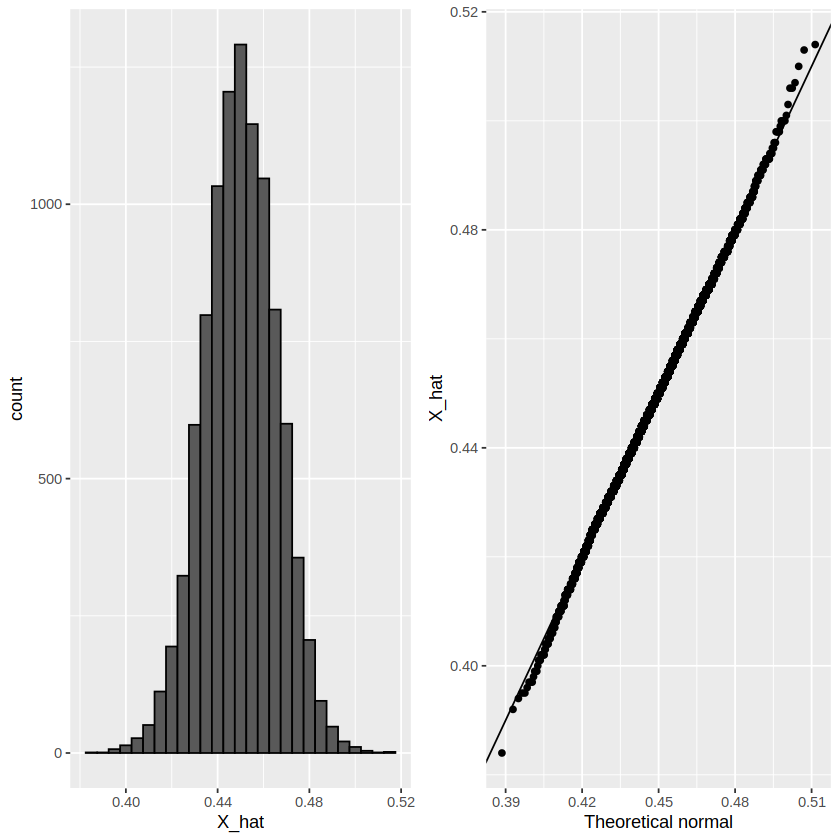

In [24]:
install.packages( "gridExtra" )
library( gridExtra )
library( dplyr )
library( ggplot2 )

p1 <- data.frame( X_hat=X_hat ) %>% ggplot( aes( X_hat ) )  +
    geom_histogram( binwidth=0.005, color="black" )

p2 <- data.frame( X_hat=X_hat ) %>% ggplot( aes( sample=X_hat) ) +
    stat_qq( dparams = list( mean=mean(X_hat), sd=sd(X_hat) ) ) +
    geom_abline() +
    ylab( "X_hat" ) +
    xlab( "Theoretical normal" )

grid.arrange( p1, p2, nrow=1 )

Note that in real life, we would never be able to run such an experiment because we don't know *p*. But we could run it for varios values of *p* and sample sizes *N* and see that the theory does indeed work well for most variables.



### The Spread



The competition is *to predict the spread*, not the *proportion p*. However, because we are assuming there are only two parties, we know that *the spread* is just:

$$p - (1 - p) = 2p - 1$$

So everything we have done can easily be adapted to estimate to *p - 1*. Once we have our estimate, $\overline{X}$, and our estimate of our standard error of $\overline{X}$, we estimate the spread by $2\overline{X} - 1$, just plugging in the $\overline{X}$ where we should have a *p*. And, since we're multiplying a random variable by 2, we know that the standard error goes up by 2, ($2\hat{SE}(\overline{X})$).

Note that substracting the 1 does not add any variability, so it does not affect the standard error.

For our first example, with just the 25 beads, our estimate *p* was *0.48* with a margin of error of *0.2*. This means that our estimate of the spread is *4\%* points, *0.04*, with a margin of error of *40\%*, *0.4*.

Again, not a very useful sample size. But the point is *that once we have an estimate and standard error for p, we have it for the **spread = 2p - 1***.



### Bias: Why not run a very large poll?

